## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  59.606488  1192.887633  0.657195  1.518840  1.550570
1  12.136312  1605.426972  0.798040  9.625596  1.539626
2  22.256184  1526.331497  0.790114  8.947159  1.514352
3  88.316364  1090.277022  0.637885  8.327974  1.440415
4  79.639319  1221.667077  0.796303  3.146148  1.469564


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.26775 | train_mse: 5.765   | train_mae: 1.77191 |  0:00:00s
epoch 1  | loss: 1.13226 | train_mse: 4.4019  | train_mae: 1.56666 |  0:00:00s
epoch 2  | loss: 0.92594 | train_mse: 4.09208 | train_mae: 1.5627  |  0:00:00s


epoch 3  | loss: 0.8677  | train_mse: 3.63853 | train_mae: 1.48082 |  0:00:00s
epoch 4  | loss: 0.92219 | train_mse: 3.02511 | train_mae: 1.36428 |  0:00:00s


epoch 5  | loss: 0.97552 | train_mse: 2.59909 | train_mae: 1.28174 |  0:00:00s
epoch 6  | loss: 0.82106 | train_mse: 2.23657 | train_mae: 1.20491 |  0:00:00s
epoch 7  | loss: 0.66434 | train_mse: 2.00814 | train_mae: 1.15232 |  0:00:00s


epoch 8  | loss: 0.6738  | train_mse: 1.79114 | train_mae: 1.0978  |  0:00:01s
epoch 9  | loss: 0.76051 | train_mse: 1.64536 | train_mae: 1.0541  |  0:00:01s
epoch 10 | loss: 0.65245 | train_mse: 1.49588 | train_mae: 1.01579 |  0:00:01s


epoch 11 | loss: 0.49262 | train_mse: 1.38987 | train_mae: 0.98311 |  0:00:01s
epoch 12 | loss: 0.65128 | train_mse: 1.2858  | train_mae: 0.94209 |  0:00:01s


epoch 13 | loss: 0.59678 | train_mse: 1.16632 | train_mae: 0.88736 |  0:00:01s
epoch 14 | loss: 0.65068 | train_mse: 1.09312 | train_mae: 0.84377 |  0:00:01s


epoch 15 | loss: 0.58645 | train_mse: 1.03325 | train_mae: 0.81845 |  0:00:01s
epoch 16 | loss: 0.66575 | train_mse: 0.97381 | train_mae: 0.79095 |  0:00:01s
epoch 17 | loss: 0.47957 | train_mse: 0.8986  | train_mae: 0.75643 |  0:00:01s


epoch 18 | loss: 0.58146 | train_mse: 0.83347 | train_mae: 0.7244  |  0:00:02s
epoch 19 | loss: 0.56688 | train_mse: 0.79589 | train_mae: 0.70087 |  0:00:02s
epoch 20 | loss: 0.55923 | train_mse: 0.7479  | train_mae: 0.67451 |  0:00:02s


epoch 21 | loss: 0.6687  | train_mse: 0.70019 | train_mae: 0.65316 |  0:00:02s
epoch 22 | loss: 0.42375 | train_mse: 0.65612 | train_mae: 0.63164 |  0:00:02s
epoch 23 | loss: 0.64575 | train_mse: 0.62396 | train_mae: 0.6167  |  0:00:02s


epoch 24 | loss: 0.7323  | train_mse: 0.58967 | train_mae: 0.60402 |  0:00:02s
epoch 25 | loss: 0.61514 | train_mse: 0.55    | train_mae: 0.58363 |  0:00:02s
epoch 26 | loss: 0.43583 | train_mse: 0.51538 | train_mae: 0.5635  |  0:00:02s


epoch 27 | loss: 0.44718 | train_mse: 0.50091 | train_mae: 0.55753 |  0:00:02s
epoch 28 | loss: 0.42235 | train_mse: 0.48251 | train_mae: 0.54717 |  0:00:03s
epoch 29 | loss: 0.45103 | train_mse: 0.46187 | train_mae: 0.53282 |  0:00:03s


epoch 30 | loss: 0.62139 | train_mse: 0.45435 | train_mae: 0.52356 |  0:00:03s
epoch 31 | loss: 0.44077 | train_mse: 0.44836 | train_mae: 0.52206 |  0:00:03s


epoch 32 | loss: 0.51148 | train_mse: 0.4582  | train_mae: 0.52883 |  0:00:03s
epoch 33 | loss: 0.40848 | train_mse: 0.44912 | train_mae: 0.52203 |  0:00:03s
epoch 34 | loss: 0.47391 | train_mse: 0.4403  | train_mae: 0.51264 |  0:00:03s


epoch 35 | loss: 0.31716 | train_mse: 0.41688 | train_mae: 0.4975  |  0:00:03s
epoch 36 | loss: 0.32425 | train_mse: 0.40048 | train_mae: 0.48837 |  0:00:03s


epoch 37 | loss: 0.25869 | train_mse: 0.39816 | train_mae: 0.48457 |  0:00:03s
epoch 38 | loss: 0.37432 | train_mse: 0.3919  | train_mae: 0.47976 |  0:00:03s


epoch 39 | loss: 0.44348 | train_mse: 0.36279 | train_mae: 0.46234 |  0:00:04s
epoch 40 | loss: 0.4108  | train_mse: 0.35106 | train_mae: 0.45252 |  0:00:04s
epoch 41 | loss: 0.44911 | train_mse: 0.33885 | train_mae: 0.44629 |  0:00:04s


epoch 42 | loss: 0.40926 | train_mse: 0.32768 | train_mae: 0.4408  |  0:00:04s
epoch 43 | loss: 0.36848 | train_mse: 0.31468 | train_mae: 0.43481 |  0:00:04s


epoch 44 | loss: 0.42263 | train_mse: 0.31498 | train_mae: 0.43231 |  0:00:04s
epoch 45 | loss: 0.39434 | train_mse: 0.31823 | train_mae: 0.43139 |  0:00:04s


epoch 46 | loss: 0.35113 | train_mse: 0.31989 | train_mae: 0.43219 |  0:00:04s
epoch 47 | loss: 0.41902 | train_mse: 0.3169  | train_mae: 0.4307  |  0:00:04s
epoch 48 | loss: 0.37295 | train_mse: 0.30502 | train_mae: 0.42376 |  0:00:04s


epoch 49 | loss: 0.4813  | train_mse: 0.29197 | train_mae: 0.41895 |  0:00:05s
epoch 50 | loss: 0.43937 | train_mse: 0.2789  | train_mae: 0.40948 |  0:00:05s
epoch 51 | loss: 0.37003 | train_mse: 0.27113 | train_mae: 0.40095 |  0:00:05s


epoch 52 | loss: 0.30867 | train_mse: 0.26603 | train_mae: 0.40095 |  0:00:05s
epoch 53 | loss: 0.22597 | train_mse: 0.2601  | train_mae: 0.39699 |  0:00:05s


epoch 54 | loss: 0.36241 | train_mse: 0.25755 | train_mae: 0.39465 |  0:00:05s
epoch 55 | loss: 0.28677 | train_mse: 0.25882 | train_mae: 0.39443 |  0:00:05s


epoch 56 | loss: 0.52986 | train_mse: 0.25919 | train_mae: 0.39032 |  0:00:05s
epoch 57 | loss: 0.40779 | train_mse: 0.26009 | train_mae: 0.39215 |  0:00:05s
epoch 58 | loss: 0.33403 | train_mse: 0.25921 | train_mae: 0.39016 |  0:00:06s


epoch 59 | loss: 0.50124 | train_mse: 0.26176 | train_mae: 0.38764 |  0:00:06s
epoch 60 | loss: 0.41685 | train_mse: 0.26209 | train_mae: 0.38226 |  0:00:06s
epoch 61 | loss: 0.53673 | train_mse: 0.25709 | train_mae: 0.3799  |  0:00:06s


epoch 62 | loss: 0.31481 | train_mse: 0.25546 | train_mae: 0.38048 |  0:00:06s
epoch 63 | loss: 0.30869 | train_mse: 0.24919 | train_mae: 0.37559 |  0:00:06s


epoch 64 | loss: 0.32521 | train_mse: 0.24694 | train_mae: 0.37498 |  0:00:06s
epoch 65 | loss: 0.41606 | train_mse: 0.24936 | train_mae: 0.37312 |  0:00:06s
epoch 66 | loss: 0.40532 | train_mse: 0.29448 | train_mae: 0.38677 |  0:00:06s


epoch 67 | loss: 0.35841 | train_mse: 0.30599 | train_mae: 0.38349 |  0:00:06s
epoch 68 | loss: 0.37245 | train_mse: 0.30759 | train_mae: 0.38671 |  0:00:07s
epoch 69 | loss: 0.47924 | train_mse: 0.30038 | train_mae: 0.38504 |  0:00:07s


epoch 70 | loss: 0.29715 | train_mse: 0.28559 | train_mae: 0.37734 |  0:00:07s
epoch 71 | loss: 0.47192 | train_mse: 0.27104 | train_mae: 0.36423 |  0:00:07s
epoch 72 | loss: 0.47592 | train_mse: 0.2675  | train_mae: 0.358   |  0:00:07s


epoch 73 | loss: 0.27498 | train_mse: 0.26241 | train_mae: 0.35594 |  0:00:07s
epoch 74 | loss: 0.32151 | train_mse: 0.26568 | train_mae: 0.36126 |  0:00:07s


epoch 75 | loss: 0.4329  | train_mse: 0.2987  | train_mae: 0.37496 |  0:00:07s
epoch 76 | loss: 0.37492 | train_mse: 0.30519 | train_mae: 0.37916 |  0:00:07s
epoch 77 | loss: 0.47315 | train_mse: 0.30149 | train_mae: 0.37888 |  0:00:07s


epoch 78 | loss: 0.29032 | train_mse: 0.28913 | train_mae: 0.37318 |  0:00:07s
epoch 79 | loss: 0.27854 | train_mse: 0.2477  | train_mae: 0.35886 |  0:00:08s
epoch 80 | loss: 0.30491 | train_mse: 0.2304  | train_mae: 0.34878 |  0:00:08s


epoch 81 | loss: 0.41679 | train_mse: 0.22193 | train_mae: 0.34319 |  0:00:08s
epoch 82 | loss: 0.39919 | train_mse: 0.21465 | train_mae: 0.33554 |  0:00:08s
epoch 83 | loss: 0.34694 | train_mse: 0.20959 | train_mae: 0.33458 |  0:00:08s


epoch 84 | loss: 0.3299  | train_mse: 0.20851 | train_mae: 0.33111 |  0:00:08s
epoch 85 | loss: 0.20879 | train_mse: 0.20403 | train_mae: 0.32816 |  0:00:08s


epoch 86 | loss: 0.25883 | train_mse: 0.19886 | train_mae: 0.32425 |  0:00:08s
epoch 87 | loss: 0.24144 | train_mse: 0.19576 | train_mae: 0.32114 |  0:00:08s
epoch 88 | loss: 0.54768 | train_mse: 0.19482 | train_mae: 0.32211 |  0:00:08s


epoch 89 | loss: 0.35119 | train_mse: 0.1933  | train_mae: 0.31716 |  0:00:09s
epoch 90 | loss: 0.35781 | train_mse: 0.19317 | train_mae: 0.31608 |  0:00:09s
epoch 91 | loss: 0.4309  | train_mse: 0.18985 | train_mae: 0.31381 |  0:00:09s


epoch 92 | loss: 0.36174 | train_mse: 0.18496 | train_mae: 0.30782 |  0:00:09s
epoch 93 | loss: 0.31709 | train_mse: 0.18316 | train_mae: 0.30815 |  0:00:09s
epoch 94 | loss: 0.27673 | train_mse: 0.18149 | train_mae: 0.31022 |  0:00:09s


epoch 95 | loss: 0.32446 | train_mse: 0.17885 | train_mae: 0.31072 |  0:00:09s
epoch 96 | loss: 0.35234 | train_mse: 0.17634 | train_mae: 0.31256 |  0:00:09s
epoch 97 | loss: 0.28186 | train_mse: 0.1749  | train_mae: 0.31488 |  0:00:09s


epoch 98 | loss: 0.27037 | train_mse: 0.17397 | train_mae: 0.31326 |  0:00:09s
epoch 99 | loss: 0.39475 | train_mse: 0.17888 | train_mae: 0.31643 |  0:00:09s
epoch 100| loss: 0.22091 | train_mse: 0.1877  | train_mae: 0.32236 |  0:00:10s


epoch 101| loss: 0.3563  | train_mse: 0.1772  | train_mae: 0.31319 |  0:00:10s
epoch 102| loss: 0.23426 | train_mse: 0.17148 | train_mae: 0.30717 |  0:00:10s
epoch 103| loss: 0.31373 | train_mse: 0.17582 | train_mae: 0.31123 |  0:00:10s


epoch 104| loss: 0.28439 | train_mse: 0.17528 | train_mae: 0.30969 |  0:00:10s
epoch 105| loss: 0.23286 | train_mse: 0.17528 | train_mae: 0.30691 |  0:00:10s


epoch 106| loss: 0.25149 | train_mse: 0.17683 | train_mae: 0.30707 |  0:00:10s
epoch 107| loss: 0.22655 | train_mse: 0.1783  | train_mae: 0.30861 |  0:00:10s
epoch 108| loss: 0.23975 | train_mse: 0.16942 | train_mae: 0.30105 |  0:00:10s


epoch 109| loss: 0.31991 | train_mse: 0.16986 | train_mae: 0.30173 |  0:00:10s
epoch 110| loss: 0.17509 | train_mse: 0.17964 | train_mae: 0.30978 |  0:00:11s
epoch 111| loss: 0.21801 | train_mse: 0.1796  | train_mae: 0.31048 |  0:00:11s


epoch 112| loss: 0.28737 | train_mse: 0.17856 | train_mae: 0.31223 |  0:00:11s
epoch 113| loss: 0.33261 | train_mse: 0.17141 | train_mae: 0.30646 |  0:00:11s
epoch 114| loss: 0.25848 | train_mse: 0.16779 | train_mae: 0.30346 |  0:00:11s


epoch 115| loss: 0.27938 | train_mse: 0.1697  | train_mae: 0.30446 |  0:00:11s
epoch 116| loss: 0.3822  | train_mse: 0.17191 | train_mae: 0.30685 |  0:00:11s
epoch 117| loss: 0.25461 | train_mse: 0.17127 | train_mae: 0.30611 |  0:00:11s


epoch 118| loss: 0.32044 | train_mse: 0.16796 | train_mae: 0.30209 |  0:00:11s
epoch 119| loss: 0.29312 | train_mse: 0.15984 | train_mae: 0.29863 |  0:00:11s
epoch 120| loss: 0.37793 | train_mse: 0.15733 | train_mae: 0.29785 |  0:00:11s


epoch 121| loss: 0.22663 | train_mse: 0.15549 | train_mae: 0.2934  |  0:00:12s
epoch 122| loss: 0.35089 | train_mse: 0.17121 | train_mae: 0.30555 |  0:00:12s
epoch 123| loss: 0.29436 | train_mse: 0.17385 | train_mae: 0.30481 |  0:00:12s


epoch 124| loss: 0.26082 | train_mse: 0.17838 | train_mae: 0.3088  |  0:00:12s
epoch 125| loss: 0.32944 | train_mse: 0.16836 | train_mae: 0.30118 |  0:00:12s
epoch 126| loss: 0.19919 | train_mse: 0.16425 | train_mae: 0.29878 |  0:00:12s


epoch 127| loss: 0.22403 | train_mse: 0.15943 | train_mae: 0.29512 |  0:00:12s
epoch 128| loss: 0.21304 | train_mse: 0.14598 | train_mae: 0.28359 |  0:00:12s


epoch 129| loss: 0.30148 | train_mse: 0.14261 | train_mae: 0.28214 |  0:00:12s
epoch 130| loss: 0.25369 | train_mse: 0.14263 | train_mae: 0.28205 |  0:00:12s
epoch 131| loss: 0.25638 | train_mse: 0.13702 | train_mae: 0.27802 |  0:00:12s


epoch 132| loss: 0.29161 | train_mse: 0.13522 | train_mae: 0.27674 |  0:00:13s
epoch 133| loss: 0.20797 | train_mse: 0.13439 | train_mae: 0.27566 |  0:00:13s
epoch 134| loss: 0.22812 | train_mse: 0.13628 | train_mae: 0.27707 |  0:00:13s


epoch 135| loss: 0.28968 | train_mse: 0.12663 | train_mae: 0.27094 |  0:00:13s
epoch 136| loss: 0.3182  | train_mse: 0.11997 | train_mae: 0.26444 |  0:00:13s
epoch 137| loss: 0.20561 | train_mse: 0.12869 | train_mae: 0.27196 |  0:00:13s


epoch 138| loss: 0.16965 | train_mse: 0.12381 | train_mae: 0.26842 |  0:00:13s
epoch 139| loss: 0.25621 | train_mse: 0.12204 | train_mae: 0.26695 |  0:00:13s


epoch 140| loss: 0.18875 | train_mse: 0.12081 | train_mae: 0.26575 |  0:00:13s
epoch 141| loss: 0.23915 | train_mse: 0.1239  | train_mae: 0.26912 |  0:00:13s
epoch 142| loss: 0.31804 | train_mse: 0.13398 | train_mae: 0.27342 |  0:00:14s


epoch 143| loss: 0.27109 | train_mse: 0.13972 | train_mae: 0.27619 |  0:00:14s
epoch 144| loss: 0.23406 | train_mse: 0.14004 | train_mae: 0.27848 |  0:00:14s
epoch 145| loss: 0.22284 | train_mse: 0.14004 | train_mae: 0.27804 |  0:00:14s


epoch 146| loss: 0.3218  | train_mse: 0.14102 | train_mae: 0.27771 |  0:00:14s
epoch 147| loss: 0.39518 | train_mse: 0.13914 | train_mae: 0.27779 |  0:00:14s
epoch 148| loss: 0.26421 | train_mse: 0.1313  | train_mae: 0.27127 |  0:00:14s


epoch 149| loss: 0.25617 | train_mse: 0.12586 | train_mae: 0.2653  |  0:00:14s
epoch 150| loss: 0.21085 | train_mse: 0.12117 | train_mae: 0.26052 |  0:00:14s
epoch 151| loss: 0.24416 | train_mse: 0.11801 | train_mae: 0.26002 |  0:00:14s


epoch 152| loss: 0.27922 | train_mse: 0.11515 | train_mae: 0.25794 |  0:00:15s
epoch 153| loss: 0.17094 | train_mse: 0.11423 | train_mae: 0.25854 |  0:00:15s


epoch 154| loss: 0.2606  | train_mse: 0.11265 | train_mae: 0.258   |  0:00:15s
epoch 155| loss: 0.16217 | train_mse: 0.10643 | train_mae: 0.2513  |  0:00:15s


epoch 156| loss: 0.20963 | train_mse: 0.1035  | train_mae: 0.24794 |  0:00:15s
epoch 157| loss: 0.36434 | train_mse: 0.10176 | train_mae: 0.24538 |  0:00:15s
epoch 158| loss: 0.25853 | train_mse: 0.10022 | train_mae: 0.24543 |  0:00:15s


epoch 159| loss: 0.18423 | train_mse: 0.10061 | train_mae: 0.24508 |  0:00:16s
epoch 160| loss: 0.25338 | train_mse: 0.10181 | train_mae: 0.24439 |  0:00:16s
epoch 161| loss: 0.45199 | train_mse: 0.10286 | train_mae: 0.24368 |  0:00:16s


epoch 162| loss: 0.29521 | train_mse: 0.10995 | train_mae: 0.25198 |  0:00:16s
epoch 163| loss: 0.35691 | train_mse: 0.12331 | train_mae: 0.26116 |  0:00:16s
epoch 164| loss: 0.20236 | train_mse: 0.12511 | train_mae: 0.26345 |  0:00:16s


epoch 165| loss: 0.35298 | train_mse: 0.12284 | train_mae: 0.26145 |  0:00:16s
epoch 166| loss: 0.19652 | train_mse: 0.12386 | train_mae: 0.26255 |  0:00:16s
epoch 167| loss: 0.36228 | train_mse: 0.12493 | train_mae: 0.26282 |  0:00:16s


epoch 168| loss: 0.21056 | train_mse: 0.12429 | train_mae: 0.26164 |  0:00:16s
epoch 169| loss: 0.23029 | train_mse: 0.12218 | train_mae: 0.25985 |  0:00:16s
epoch 170| loss: 0.19145 | train_mse: 0.12085 | train_mae: 0.25791 |  0:00:17s


epoch 171| loss: 0.32397 | train_mse: 0.11577 | train_mae: 0.25178 |  0:00:17s
epoch 172| loss: 0.24262 | train_mse: 0.11355 | train_mae: 0.24987 |  0:00:17s
epoch 173| loss: 0.28679 | train_mse: 0.11181 | train_mae: 0.24811 |  0:00:17s


epoch 174| loss: 0.20381 | train_mse: 0.10916 | train_mae: 0.24404 |  0:00:17s
epoch 175| loss: 0.33277 | train_mse: 0.10792 | train_mae: 0.24166 |  0:00:17s


epoch 176| loss: 0.19533 | train_mse: 0.10796 | train_mae: 0.24136 |  0:00:17s
epoch 177| loss: 0.30151 | train_mse: 0.10546 | train_mae: 0.2399  |  0:00:17s


epoch 178| loss: 0.19708 | train_mse: 0.10463 | train_mae: 0.23967 |  0:00:17s
epoch 179| loss: 0.44416 | train_mse: 0.10079 | train_mae: 0.23547 |  0:00:17s
epoch 180| loss: 0.32553 | train_mse: 0.09917 | train_mae: 0.23185 |  0:00:18s


epoch 181| loss: 0.18435 | train_mse: 0.09914 | train_mae: 0.22925 |  0:00:18s
epoch 182| loss: 0.17345 | train_mse: 0.09656 | train_mae: 0.22504 |  0:00:18s
epoch 183| loss: 0.17302 | train_mse: 0.09558 | train_mae: 0.22353 |  0:00:18s


epoch 184| loss: 0.18491 | train_mse: 0.09463 | train_mae: 0.22211 |  0:00:18s
epoch 185| loss: 0.22273 | train_mse: 0.09289 | train_mae: 0.21965 |  0:00:18s


epoch 186| loss: 0.23463 | train_mse: 0.09148 | train_mae: 0.21764 |  0:00:18s
epoch 187| loss: 0.23744 | train_mse: 0.0916  | train_mae: 0.21721 |  0:00:18s
epoch 188| loss: 0.18735 | train_mse: 0.09031 | train_mae: 0.21719 |  0:00:18s


epoch 189| loss: 0.15484 | train_mse: 0.08866 | train_mae: 0.21523 |  0:00:18s
epoch 190| loss: 0.22917 | train_mse: 0.08746 | train_mae: 0.21395 |  0:00:18s


epoch 191| loss: 0.31161 | train_mse: 0.08707 | train_mae: 0.21369 |  0:00:19s
epoch 192| loss: 0.16716 | train_mse: 0.08773 | train_mae: 0.21421 |  0:00:19s
epoch 193| loss: 0.23232 | train_mse: 0.0886  | train_mae: 0.21567 |  0:00:19s


epoch 194| loss: 0.13729 | train_mse: 0.08841 | train_mae: 0.21739 |  0:00:19s
epoch 195| loss: 0.15343 | train_mse: 0.08693 | train_mae: 0.2161  |  0:00:19s
epoch 196| loss: 0.29242 | train_mse: 0.08803 | train_mae: 0.21738 |  0:00:19s


epoch 197| loss: 0.26882 | train_mse: 0.08772 | train_mae: 0.21719 |  0:00:19s
epoch 198| loss: 0.15839 | train_mse: 0.08753 | train_mae: 0.21691 |  0:00:19s
epoch 199| loss: 0.13305 | train_mse: 0.08734 | train_mae: 0.2153  |  0:00:19s


epoch 200| loss: 0.3172  | train_mse: 0.08651 | train_mae: 0.21301 |  0:00:19s
epoch 201| loss: 0.27014 | train_mse: 0.0874  | train_mae: 0.215   |  0:00:20s
epoch 202| loss: 0.25496 | train_mse: 0.08691 | train_mae: 0.21353 |  0:00:20s


epoch 203| loss: 0.21539 | train_mse: 0.08871 | train_mae: 0.21551 |  0:00:20s
epoch 204| loss: 0.20067 | train_mse: 0.08955 | train_mae: 0.21646 |  0:00:20s
epoch 205| loss: 0.41785 | train_mse: 0.09012 | train_mae: 0.21663 |  0:00:20s


epoch 206| loss: 0.17789 | train_mse: 0.09163 | train_mae: 0.21539 |  0:00:20s
epoch 207| loss: 0.18292 | train_mse: 0.09334 | train_mae: 0.21279 |  0:00:20s


epoch 208| loss: 0.15026 | train_mse: 0.09277 | train_mae: 0.21118 |  0:00:20s
epoch 209| loss: 0.19072 | train_mse: 0.09139 | train_mae: 0.21069 |  0:00:20s
epoch 210| loss: 0.23364 | train_mse: 0.08838 | train_mae: 0.20917 |  0:00:20s


epoch 211| loss: 0.12804 | train_mse: 0.08702 | train_mae: 0.2091  |  0:00:20s
epoch 212| loss: 0.27316 | train_mse: 0.08885 | train_mae: 0.21247 |  0:00:21s


epoch 213| loss: 0.36765 | train_mse: 0.08984 | train_mae: 0.2132  |  0:00:21s
epoch 214| loss: 0.26843 | train_mse: 0.09179 | train_mae: 0.21635 |  0:00:21s
epoch 215| loss: 0.10617 | train_mse: 0.09008 | train_mae: 0.2153  |  0:00:21s


epoch 216| loss: 0.25188 | train_mse: 0.08834 | train_mae: 0.21399 |  0:00:21s
epoch 217| loss: 0.27209 | train_mse: 0.08717 | train_mae: 0.21281 |  0:00:21s


epoch 218| loss: 0.14061 | train_mse: 0.08614 | train_mae: 0.21184 |  0:00:21s
epoch 219| loss: 0.19227 | train_mse: 0.08388 | train_mae: 0.21051 |  0:00:21s
epoch 220| loss: 0.14176 | train_mse: 0.08336 | train_mae: 0.20986 |  0:00:21s


epoch 221| loss: 0.26281 | train_mse: 0.08423 | train_mae: 0.21162 |  0:00:21s
epoch 222| loss: 0.26367 | train_mse: 0.08549 | train_mae: 0.21355 |  0:00:22s
epoch 223| loss: 0.18824 | train_mse: 0.08648 | train_mae: 0.21594 |  0:00:22s


epoch 224| loss: 0.25107 | train_mse: 0.09066 | train_mae: 0.22082 |  0:00:22s
epoch 225| loss: 0.20405 | train_mse: 0.09493 | train_mae: 0.22708 |  0:00:22s
epoch 226| loss: 0.11025 | train_mse: 0.09892 | train_mae: 0.23242 |  0:00:22s


epoch 227| loss: 0.12227 | train_mse: 0.09983 | train_mae: 0.23294 |  0:00:22s
epoch 228| loss: 0.1678  | train_mse: 0.10008 | train_mae: 0.23242 |  0:00:22s
epoch 229| loss: 0.14025 | train_mse: 0.10396 | train_mae: 0.23529 |  0:00:22s


epoch 230| loss: 0.21824 | train_mse: 0.10966 | train_mae: 0.23925 |  0:00:22s
epoch 231| loss: 0.27554 | train_mse: 0.11228 | train_mae: 0.24136 |  0:00:22s
epoch 232| loss: 0.23736 | train_mse: 0.11109 | train_mae: 0.23882 |  0:00:22s


epoch 233| loss: 0.20868 | train_mse: 0.11205 | train_mae: 0.23509 |  0:00:23s
epoch 234| loss: 0.23965 | train_mse: 0.10531 | train_mae: 0.23124 |  0:00:23s
epoch 235| loss: 0.32946 | train_mse: 0.0991  | train_mae: 0.22819 |  0:00:23s


epoch 236| loss: 0.20831 | train_mse: 0.09295 | train_mae: 0.22518 |  0:00:23s
epoch 237| loss: 0.20409 | train_mse: 0.08865 | train_mae: 0.22179 |  0:00:23s
epoch 238| loss: 0.16478 | train_mse: 0.0869  | train_mae: 0.21932 |  0:00:23s


epoch 239| loss: 0.27479 | train_mse: 0.08764 | train_mae: 0.21961 |  0:00:23s
epoch 240| loss: 0.2083  | train_mse: 0.09083 | train_mae: 0.22249 |  0:00:23s
epoch 241| loss: 0.32694 | train_mse: 0.08941 | train_mae: 0.21946 |  0:00:23s


epoch 242| loss: 0.22053 | train_mse: 0.10368 | train_mae: 0.23469 |  0:00:23s
epoch 243| loss: 0.1524  | train_mse: 0.10329 | train_mae: 0.23496 |  0:00:23s
epoch 244| loss: 0.27563 | train_mse: 0.09352 | train_mae: 0.22775 |  0:00:24s


epoch 245| loss: 0.20569 | train_mse: 0.09432 | train_mae: 0.22608 |  0:00:24s
epoch 246| loss: 0.22783 | train_mse: 0.09299 | train_mae: 0.22325 |  0:00:24s
epoch 247| loss: 0.23264 | train_mse: 0.09239 | train_mae: 0.22234 |  0:00:24s


epoch 248| loss: 0.3606  | train_mse: 0.09169 | train_mae: 0.22419 |  0:00:24s
epoch 249| loss: 0.12779 | train_mse: 0.08867 | train_mae: 0.22031 |  0:00:24s
epoch 250| loss: 0.14581 | train_mse: 0.08894 | train_mae: 0.21969 |  0:00:24s


epoch 251| loss: 0.30303 | train_mse: 0.09035 | train_mae: 0.22036 |  0:00:24s
epoch 252| loss: 0.14179 | train_mse: 0.09109 | train_mae: 0.21948 |  0:00:24s
epoch 253| loss: 0.21169 | train_mse: 0.09124 | train_mae: 0.21905 |  0:00:24s


epoch 254| loss: 0.24925 | train_mse: 0.08623 | train_mae: 0.21323 |  0:00:24s
epoch 255| loss: 0.16085 | train_mse: 0.08356 | train_mae: 0.21262 |  0:00:25s
epoch 256| loss: 0.20416 | train_mse: 0.08275 | train_mae: 0.21317 |  0:00:25s


epoch 257| loss: 0.15878 | train_mse: 0.08169 | train_mae: 0.21252 |  0:00:25s
epoch 258| loss: 0.14315 | train_mse: 0.07961 | train_mae: 0.2109  |  0:00:25s
epoch 259| loss: 0.30443 | train_mse: 0.07964 | train_mae: 0.21121 |  0:00:25s


epoch 260| loss: 0.14137 | train_mse: 0.08007 | train_mae: 0.21208 |  0:00:25s
epoch 261| loss: 0.11246 | train_mse: 0.08174 | train_mae: 0.21459 |  0:00:25s

Early stopping occurred at epoch 261 with best_epoch = 211 and best_train_mae = 0.2091
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.672912917851038


ABC Pre-generator MAE 0.7004204403215287


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

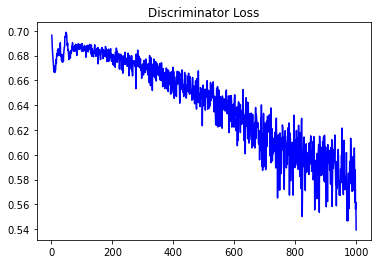

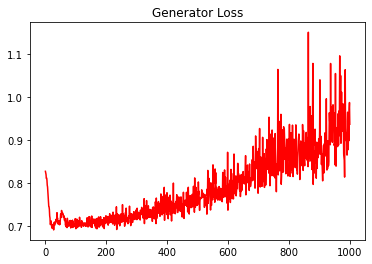

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.7308295861631632


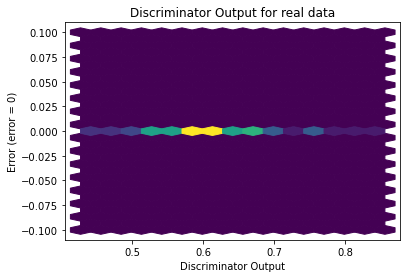

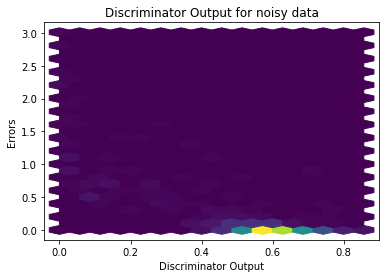

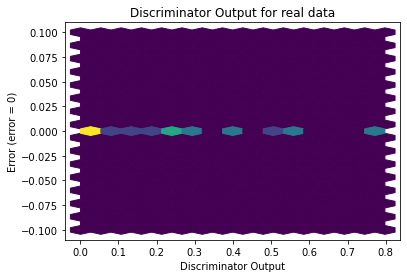

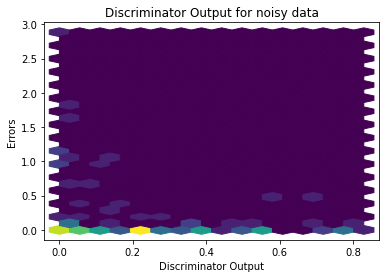

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


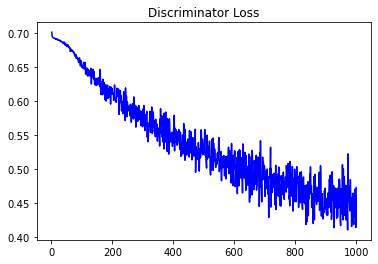

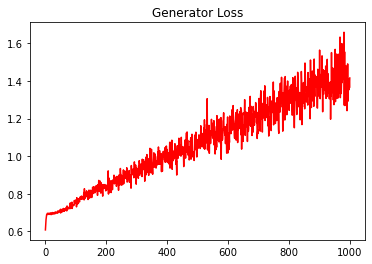

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.6740264761250182


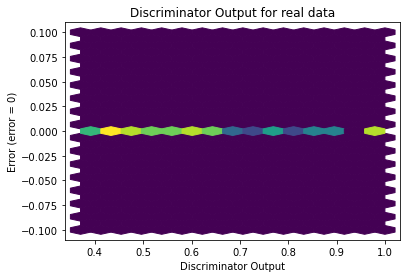

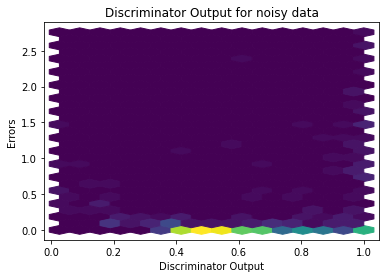

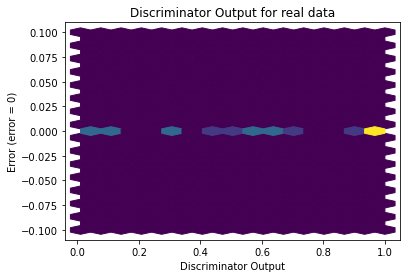

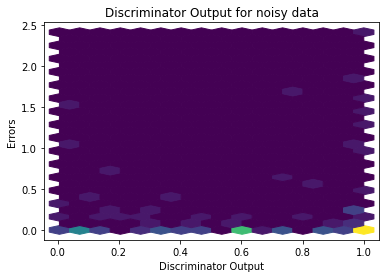

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
